**TITLE: CLASSIFICATION DEFAULT OF CREDIT CARD HOLDERS IN A BANK IN TAIWAN, 2005** 

**INTRODUCTION**

Support Vector Machine(SVM) is a supervised machine learning algorithm used for both classification and regression. Though we say regression problems as well its best suited for classification. The objective of SVM algorithm is to find a hyperplane in an N-dimensional space that distinctly classifies the data points. The dimension of the hyperplane depends upon the number of features. If the number of input features is two, then the hyperplane is just a line. If the number of input features is three, then the hyperplane becomes a 2-D plane. It becomes difficult to imagine when the number of features exceeds three. 

The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.

To separate the two classes of data points, there are many possible hyperplanes that could be chosen. Our objective is to find a plane that has the maximum margin, i.e the maximum distance between data points of both classes. Maximizing the margin distance provides some reinforcement so that future data points can be classified with more confidence.

Hyperplanes and Support Vectors

Hyperplanes are decision boundaries that help classify the data points. Data points falling on either side of the hyperplane can be attributed to different classes. Also, the dimension of the hyperplane depends upon the number of features. If the number of input features is 2, then the hyperplane is just a line. If the number of input features is 3, then the hyperplane becomes a two-dimensional plane. It becomes difficult to imagine when the number of features exceeds 3.

Support vectors are data points that are closer to the hyperplane and influence the position and orientation of the hyperplane. Using these support vectors, we maximize the margin of the classifier. Deleting the support vectors will change the position of the hyperplane. These are the points that help us build our SVM.

**OBJECTIVE**

To classify the clients as per the default of credit card holders in a bank in Taiwan, 2005 based on various othere explanotory variables using Support vector machine.

**BUSINESS GOAL**

Sometimes credit card-issuing banks in order to gain large amount of market share issue credit cards to unqualified clients without suffient information about their ability of repayment of the bills. When the card holders overuse their cards to consume servises and goods irrespective of their repayment ability of the bills, they accumulate a heavy debts.

In the area of consumer finance it is pivotal for the card issuing banks to be able to estimate the chance for a card holder to become default for risk analysis and approving the credit card applications.

We are required to build a classification algorithm using support vector machine which would help bank to classify the clientsaccording to the default of credit card holders based on various other explainatory variables. 

**PACKAGES AND LIBRARIES**

In [ ]:
#Loading the pandas and numpy that will be used to handle the data.
import pandas as pd
import numpy as np

#Loading matplotlib and seaborn which is required to perform the exploratory data analysis.
import seaborn as sns 
import matplotlib.pyplot as plt

#Importing the SVM from sk
from sklearn.svm import SVC

**DATA DESCRIPTION**

The dataset ‘Default of credit card clients’ consists of informations about transactions from April 2005 to September 2005 of 30000 clients who were credit holders in a bank in Taiwan. This dataset has binary response variable ‘default.payment.next.month’ that takes the value 1 if the corresponding client has default payment and -1 otherwise. Out of 30000 clients 6636(22.12%) were with default payment. There are 23 other independent or explanatory variables:

LIMIT_BAL: Amount of the given credit(NT dollar), it includes both the individual consumer credit as well as the person’s family credit

SEX: 1=male and 2= female

EDUCATION: 1= graduate school, 2= university,3=high-school , 4=others

MARRIAGE: Marital status. 1=married,2=single, 3= others

AGE: Age of the client

PAY_1-PAY_6: History of past payments from April to September 2005. 
Like PAY_1=The repayment status in September, …., 
PAY_6=The repayment status of April 2005. The scaling of the status is as follows -2= no transactions history,-1=paid duly,0=revolving ,1=payment delay for one month ,2= payment delay for 2 months ,….,9=payment delay for 9 months or more.

BILL_AMT1-BILL_AMT6: Amount of bill statement (NT dollar).
BILL_AMT1=amount of bill statement in September ,…., 
BILL_AMT6= amount of bill statement in April 2005.

PAY_AMT1-PAY_AMT6:Amount of previous payment(NT dollar).
PAY_AMT1=amount paid in September ,…., PAY_AMT6=amount paid in April 2005.

Y-Default payment next month

What is default?

When a customer accepts a credit card from a bank or issuer, he/she agrees to certain terms and condition such as he/she needs to make their minimum payment by the due date listed on their credit card statements. If the consumer fails to make the payment for the debt by the due date, the issuer mark the credit card as default and might charge a penulty rate, decreasing credit limit and and in case of serious delniquency, close the account.

How credit default happens?

Sometimes credit card-issuing banks in order to gain large amount of market share issue credit cards to unqualified clients without suffient information about their ability of repayment of the bills. When the card holders overuse their cards to consume servises and goods irrespective of their repayment ability of the bills, they accumulate a heavy debts.

In the area of consumer finance it is pivotal for the card issuing banks to be able to estimate the chance for a card holder to become default for risk analysis and approving the credit card applications.



In [ ]:
#Loading the required dataset.
data=pd.read_csv("/content/default of credit card clients.csv")

#Viewing 'bank' data set.
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10973,10974,80000.0,2.0,2.0,2.0,48.0,0.0,0.0,0.0,2.0,0.0,0.0,60261.0,60129.0,57488.0,47846.0,48464.0,48940.0,2234.0,5311.0,0.0,1787.0,1700.0,1500.0,0.0
10974,10975,30000.0,1.0,2.0,2.0,29.0,2.0,2.0,2.0,2.0,2.0,2.0,21959.0,24685.0,24983.0,25375.0,25923.0,25358.0,3400.0,1000.0,1100.0,1100.0,0.0,2100.0,0.0
10975,10976,200000.0,2.0,2.0,2.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,21447.0,23429.0,26158.0,29486.0,27166.0,25954.0,2649.0,3500.0,4008.0,1098.0,1500.0,1000.0,0.0
10976,10977,200000.0,1.0,1.0,1.0,49.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,390.0,390.0,390.0,390.0,390.0,390.0,390.0,390.0,390.0,390.0,390.0,390.0,0.0


**EXPLORATORY DATA ANALYSIS**

In [ ]:
#Obtaining the dimension of the dataset.
data.shape

(10978, 25)

It is observed that the dataset comprises of 30000 records and 25 columns(variables) which are described in the data description. 

In [ ]:
#Using info() function to understand if ther is any null values in the dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10978 entries, 0 to 10977
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          10978 non-null  int64  
 1   LIMIT_BAL                   10977 non-null  float64
 2   SEX                         10977 non-null  float64
 3   EDUCATION                   10977 non-null  float64
 4   MARRIAGE                    10977 non-null  float64
 5   AGE                         10977 non-null  float64
 6   PAY_0                       10977 non-null  float64
 7   PAY_2                       10977 non-null  float64
 8   PAY_3                       10977 non-null  float64
 9   PAY_4                       10977 non-null  float64
 10  PAY_5                       10977 non-null  float64
 11  PAY_6                       10977 non-null  float64
 12  BILL_AMT1                   10977 non-null  float64
 13  BILL_AMT2                   109

From the above table it is observed that there exist null value in the dataset hence we try to remove the null values from the dataset.

In [ ]:
#Removing the null values
data=data.dropna()

In [ ]:
#Viewing the datset.
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10972,10973,50000.0,2.0,3.0,2.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,50089.0,41382.0,36995.0,17726.0,13623.0,13781.0,1798.0,1117.0,4749.0,500.0,508.0,250.0,0.0
10973,10974,80000.0,2.0,2.0,2.0,48.0,0.0,0.0,0.0,2.0,0.0,0.0,60261.0,60129.0,57488.0,47846.0,48464.0,48940.0,2234.0,5311.0,0.0,1787.0,1700.0,1500.0,0.0
10974,10975,30000.0,1.0,2.0,2.0,29.0,2.0,2.0,2.0,2.0,2.0,2.0,21959.0,24685.0,24983.0,25375.0,25923.0,25358.0,3400.0,1000.0,1100.0,1100.0,0.0,2100.0,0.0
10975,10976,200000.0,2.0,2.0,2.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,21447.0,23429.0,26158.0,29486.0,27166.0,25954.0,2649.0,3500.0,4008.0,1098.0,1500.0,1000.0,0.0


In [ ]:
#Using info() function to understand if ther is any null values in the dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10977 entries, 0 to 10976
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          10977 non-null  int64  
 1   LIMIT_BAL                   10977 non-null  float64
 2   SEX                         10977 non-null  float64
 3   EDUCATION                   10977 non-null  float64
 4   MARRIAGE                    10977 non-null  float64
 5   AGE                         10977 non-null  float64
 6   PAY_0                       10977 non-null  float64
 7   PAY_2                       10977 non-null  float64
 8   PAY_3                       10977 non-null  float64
 9   PAY_4                       10977 non-null  float64
 10  PAY_5                       10977 non-null  float64
 11  PAY_6                       10977 non-null  float64
 12  BILL_AMT1                   10977 non-null  float64
 13  BILL_AMT2                   109

Now, we observe that there does not exists any null values thus we can proceed for the analysis

Our study variable in the analysis is Y-Default payment next month which takes value **1 if the corresponding client has default payment and -1 otherwise**

In [ ]:
#Rename the columns of data
data = data.rename(columns = {'default payment next month': 'Y'}, inplace = False)

In [ ]:
#The categorical variable Y which is coded as 0 and 1 is eplaced by -1 and 1.
data['Y']=data['Y'].replace({1:1,0:-1})

In [ ]:
#Obtaining the dataset.
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y
0,1,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,-1.0
3,4,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,-1.0
4,5,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10972,10973,50000.0,2.0,3.0,2.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,50089.0,41382.0,36995.0,17726.0,13623.0,13781.0,1798.0,1117.0,4749.0,500.0,508.0,250.0,-1.0
10973,10974,80000.0,2.0,2.0,2.0,48.0,0.0,0.0,0.0,2.0,0.0,0.0,60261.0,60129.0,57488.0,47846.0,48464.0,48940.0,2234.0,5311.0,0.0,1787.0,1700.0,1500.0,-1.0
10974,10975,30000.0,1.0,2.0,2.0,29.0,2.0,2.0,2.0,2.0,2.0,2.0,21959.0,24685.0,24983.0,25375.0,25923.0,25358.0,3400.0,1000.0,1100.0,1100.0,0.0,2100.0,-1.0
10975,10976,200000.0,2.0,2.0,2.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,21447.0,23429.0,26158.0,29486.0,27166.0,25954.0,2649.0,3500.0,4008.0,1098.0,1500.0,1000.0,-1.0


In [ ]:
#Obtaining the descriptive measure using describe() function
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y
count,10977.000000,10977.000000,10977.000000,10977.000000,10977.000000,10977.000000,10977.000000,10977.000000,10977.000000,10977.000000,10977.000000,10977.000000,10977.000000,10977.000000,1.097700e+04,10977.000000,10977.000000,10977.000000,10977.000000,1.097700e+04,10977.000000,10977.000000,10977.000000,10977.000000,10977.000000
mean,5489.000000,166053.202150,1.579849,1.817163,1.568188,35.399107,0.003006,-0.144666,-0.164617,-0.242234,-0.258541,-0.279676,49815.848593,47917.748201,4.517616e+04,40415.753393,39170.715769,37716.195591,5621.566730,5.739040e+03,4525.927758,4637.487656,4827.600984,5258.881388,-0.549968
std,3168.931287,130252.412825,0.493605,0.766702,0.522037,9.324109,1.121650,1.203367,1.216742,1.140898,1.129395,1.161416,72064.683649,69969.725890,6.778743e+04,61243.904180,59345.749489,58973.804647,15466.465871,2.334006e+04,15789.990844,14200.033512,15285.041249,18338.429869,0.835224
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-15308.000000,-33350.000000,-3.404100e+04,-170000.000000,-28335.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,2745.000000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3391.000000,2874.000000,2.467000e+03,1961.000000,1500.000000,986.000000,907.000000,6.020000e+02,274.000000,223.000000,200.000000,0.000000,-1.000000
50%,5489.000000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21986.000000,21087.000000,1.975300e+04,18527.000000,17781.000000,16412.000000,2103.000000,2.000000e+03,1493.000000,1500.000000,1500.000000,1348.000000,-1.000000
75%,8233.000000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,64393.000000,61865.000000,5.801700e+04,49648.000000,49318.000000,48145.000000,5001.000000,5.000000e+03,4000.000000,4000.000000,4003.000000,4000.000000,-1.000000
max,10977.000000,1000000.000000,2.000000,6.000000,3.000000,75.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,405016.000000,1.684259e+06,896040.000000,497000.000000,379267.000000,528666.000000,1.000000


Thus, from the above summary that the mean of the study variable (default payment next month) is 0.22 which is closer to 0 which concludes that there are more 0s that means there are more clients who do not have  default payment in our dataset which indicates that it is a imbalanced dataset.
On similar lines we can draw meaningful insights about the other variables using the summary table.

In [ ]:
#Counts of each classes in study variable(fueltype)
data['Y'].value_counts()

-1.0    8507
 1.0    2470
Name: Y, dtype: int64

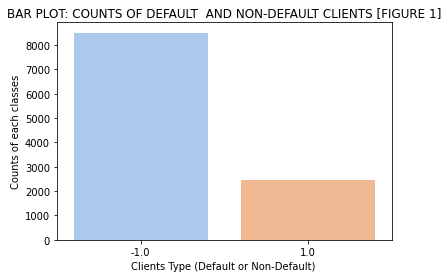

In [ ]:
#Obtaining the bar plot of fueltype visualizing the counts of each classes i.e. Default or Non-Default .
sns.countplot(x='Y',data=data, palette="pastel")
plt.title("BAR PLOT: COUNTS OF DEFAULT  AND NON-DEFAULT CLIENTS [FIGURE 1]")
plt.ylabel("Counts of each classes")
plt.xlabel("Clients Type (Default or Non-Default) ")
plt.show()

Thus, it is observed from the calculation and figure 1 obtained above that there are around 23364 non-default cvlients and 6636 default clients out of 30000 in 2005 which is still safe for the bank. Since here one class is having more frequency than another class thus we call it as imbalance dataset and we will oversample the minority class ('diesel') using SMOTE in later stage of the analysis.


In [ ]:
#Obtaining the percentage of proportion of each classes of  the study variable i.e. default payment next month (Default or Non-Default).
count_non_default = len(data[data['Y']==-1])
count_default = len(data[data['Y']==1])
pct_of_non_default = count_non_default/(count_non_default+count_default)
print("percentage of proportion of Non-default clients", pct_of_non_default*100)
pct_of_default = count_default/(count_non_default+count_default)
print("percentage of  proportion of default clients", pct_of_default*100)

percentage of proportion of Non-default clients 77.49840575749293
percentage of  proportion of default clients 22.50159424250706


Thus we observe that there were 22.12% of total clients were default clients in bank of Taiwan in 2005.

In [ ]:
#Obtaining the average of each type client(Default or Non-Default)..
data.groupby('Y').mean()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
Y,,,,,,,,,,,,,,,,,,,,,,,,
-1.0,5476.808746,174462.912895,1.588574,1.811567,1.576231,35.376278,-0.179852,-0.295639,-0.309040,-0.361232,-0.370518,-0.382038,50416.985306,48372.497825,45651.006465,40604.773128,39302.154343,37819.985306,6260.596215,6488.537205,4948.868461,5101.698484,5211.797696,5787.729282
1.0,5530.988259,137089.068826,1.549798,1.836437,1.540486,35.477733,0.632794,0.375304,0.332794,0.167611,0.127126,0.072874,47745.455870,46351.531579,43540.724291,39764.744939,38718.024291,37358.730364,3420.666397,3157.676518,3069.265182,3038.685425,3504.377733,3437.460729


On observing the average age of the client in the bank we can see that the average age is 35.4 in non default clients where as among the default clients it is 35.7 which is little more but such small difference wouldn't make any difference thus we can say that the default and non default clients are around the age 35-36.

Also it is observed that average sex is closer to 2 in both types of client which indicates that in the both groups there are more female clients since female clients are denoted by 2 i  the dataset .

On the similar lines we can make interpretation about other average values under other categorical variables also which are obtained below.

In [ ]:
#Obtaining the average of each of the classes of sex of clients.
data.groupby('SEX').mean()

,ID,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y
SEX,,,,,,,,,,,,,,,,,,,,,,,,
1.0,5481.010408,162408.933218,1.798569,1.584779,36.429965,0.066782,-0.052905,-0.079358,-0.171292,-0.191240,-0.238942,52621.296401,50142.849523,46588.877493,41552.934952,39808.535343,38578.343886,5660.194493,5761.444276,4665.851474,4574.935603,5066.387901,5329.942541,-0.517780
2.0,5494.789159,168693.794187,1.830636,1.556167,34.652160,-0.043205,-0.211155,-0.226394,-0.293637,-0.307306,-0.309191,47783.055931,46305.467400,44152.521288,39591.765750,38708.559623,37091.493637,5593.577533,5722.806913,4424.540770,4682.812097,4654.578947,5207.391359,-0.573291


In [ ]:
#Obtaining the average of each of the classes of education status of clients.
data.groupby('EDUCATION').mean()

,ID,LIMIT_BAL,SEX,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y
EDUCATION,,,,,,,,,,,,,,,,,,,,,,,,
0.0,5531.000000,306666.666667,1.333333,2.000000,35.666667,0.666667,-0.666667,-1.000000,-0.666667,-0.666667,-1.333333,13416.666667,11550.666667,28298.333333,18119.333333,12991.000000,503.666667,11543.333333,28523.666667,15140.333333,9201.000000,1082.666667,1100.000000,-1.000000
1.0,5471.262203,210905.077263,1.563895,1.656610,34.256071,-0.209222,-0.423596,-0.411087,-0.457689,-0.455727,-0.465784,47950.508462,46347.112092,44888.837871,40651.616630,39108.460633,37420.701987,6769.487123,7483.476085,5724.631101,5491.710081,5806.696100,6628.861908,-0.582046
2.0,5531.891404,144023.426643,1.594997,1.540798,34.549335,0.126663,0.026603,-0.023030,-0.110383,-0.136589,-0.157038,51603.115942,49663.373040,46149.629541,41542.531864,40246.481040,38919.239825,4979.197141,4683.060949,3833.406393,4008.236649,4371.206869,4573.736550,-0.530276
3.0,5381.495697,124308.663224,1.565691,1.441193,40.548480,0.152610,0.026391,0.021228,-0.105565,-0.138267,-0.183018,47106.231211,44954.434309,41837.700516,35840.250143,35719.658061,34612.641997,4703.516351,4657.616753,3438.809524,4409.226621,3771.165232,3645.141710,-0.508893
4.0,5639.100000,184666.666667,1.600000,1.600000,33.433333,-0.366667,-0.633333,-0.666667,-0.633333,-0.600000,-0.533333,71373.566667,49161.333333,38768.633333,29508.066667,25558.233333,24920.433333,5240.600000,3231.366667,10654.366667,1706.433333,3955.100000,3435.100000,-0.933333
5.0,6187.840000,161200.000000,1.733333,1.520000,34.373333,-0.053333,-0.173333,-0.280000,-0.280000,-0.280000,-0.400000,81826.506667,79447.120000,73016.106667,62534.293333,57902.186667,51860.146667,6293.853333,7203.493333,6225.613333,5361.866667,5458.880000,10494.586667,-0.840000
6.0,4373.250000,186666.666667,1.750000,1.583333,43.750000,-0.416667,-0.583333,-0.666667,-0.916667,-0.833333,-0.916667,82070.500000,88160.916667,65329.250000,46510.250000,33540.000000,36816.333333,13867.250000,4811.416667,17258.500000,13357.833333,16370.750000,34669.250000,-1.000000


In [ ]:
#Obtaining the average of each of the classes of marriage status of clients.
data.groupby('MARRIAGE').mean()

,ID,LIMIT_BAL,SEX,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y
MARRIAGE,,,,,,,,,,,,,,,,,,,,,,,,
0.0,4852.333333,110555.555556,1.611111,2.666667,38.777778,-0.222222,-0.222222,-0.500000,-0.611111,-0.444444,-0.500000,23910.500000,28220.555556,19786.444444,18916.000000,15700.722222,14893.611111,10343.444444,3038.277778,4208.277778,1843.277778,1348.333333,2229.000000,-0.888889
1.0,5504.095967,183546.225440,1.596484,1.944778,40.242606,-0.014271,-0.181593,-0.207653,-0.287073,-0.312306,-0.329059,52418.207653,50531.285419,48145.109824,42644.762771,41578.099483,39850.888521,6139.468666,6431.381386,4869.549948,5039.746019,5060.268666,5374.405171,-0.519338
2.0,5492.712998,153704.321709,1.565493,1.702486,31.304522,0.012848,-0.119306,-0.133489,-0.209411,-0.218755,-0.243451,47908.536459,46073.324545,43044.855665,39005.015184,37612.349074,36254.325213,5249.108960,5219.228600,4290.742700,4364.505089,4605.208744,5248.430502,-0.573502
3.0,4849.450382,92977.099237,1.618321,2.236641,43.488550,0.221374,0.068702,0.045802,-0.038168,-0.068702,-0.083969,44582.351145,38541.625954,36588.694656,25639.335878,24835.229008,28941.809160,2897.061069,4337.343511,2646.297710,2663.145038,6892.297710,1889.511450,-0.557252


In [ ]:
#Obtaiing the contingency table.
pd.crosstab(data.SEX,data.Y)

Y,-1.0,1.0
SEX,,
1.0,3500,1112
2.0,5007,1358


Thus it is observed that most of the clients who are no- default are males while there are around 2873 default female clients.

In [ ]:
#Obtaiing the contingency table.
pd.crosstab(data.MARRIAGE,data.Y)

Y,-1.0,1.0
MARRIAGE,,
0.0,17,1
1.0,3673,1162
2.0,4715,1278
3.0,102,29


Thus it is observed that the maximum number of default female clients are single.

In [ ]:
#Obtaiing the contingency table.
pd.crosstab(data.EDUCATION,data.Y)

Y,-1.0,1.0
EDUCATION,,
0.0,3,0
1.0,3225,852
2.0,3854,1183
3.0,1315,428
4.0,29,1
5.0,69,6
6.0,12,0


Thus it is observed that the maximum number of default female clients are university graduate and maximum number of non default clients of bank are also university graduates..

Text(0, 0.5, 'Frequency of client type')

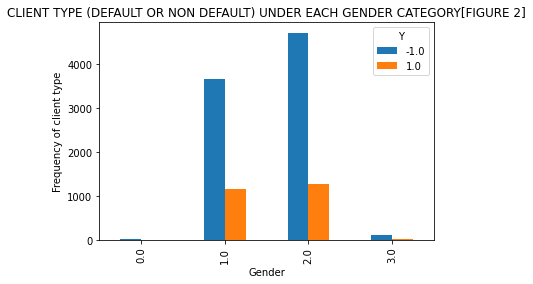

In [ ]:
#BAR PLOT FOR CLIENT TYPE (DEFAULT OR NON DEFAULT) UNDER EACH GENDER CATEGORY
pd.crosstab(data.MARRIAGE,data.Y).plot(kind='bar')
plt.title('CLIENT TYPE (DEFAULT OR NON DEFAULT) UNDER EACH GENDER CATEGORY[FIGURE 2]')
plt.xlabel('Gender')
plt.ylabel('Frequency of client type')

Thus, it is observed from the visualization that proportion of default and non default female clients is more among all the clients of the bank. 

Text(0, 0.5, 'Frequency of client type')

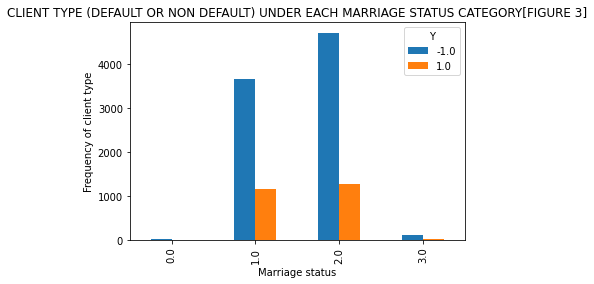

In [ ]:
#BAR PLOT FOR CLIENT TYPE (DEFAULT OR NON DEFAULT) UNDER EACH MARRIAGE STATUS CATEGORY
pd.crosstab(data.MARRIAGE,data.Y).plot(kind='bar')
plt.title('CLIENT TYPE (DEFAULT OR NON DEFAULT) UNDER EACH MARRIAGE STATUS CATEGORY[FIGURE 3]')
plt.xlabel('Marriage status')
plt.ylabel('Frequency of client type')

Thus, from figure 3 it is observed that most of the default clients are single.

Text(0, 0.5, 'Frequency of client type')

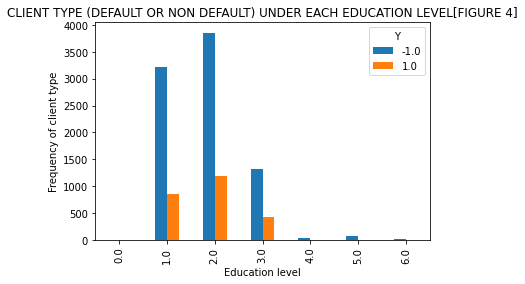

In [ ]:
#BAR PLOT FOR CLIENT TYPE (DEFAULT OR NON DEFAULT) UNDER EACH EDUCATION LEVEL
pd.crosstab(data.EDUCATION,data.Y).plot(kind='bar')
plt.title('CLIENT TYPE (DEFAULT OR NON DEFAULT) UNDER EACH EDUCATION LEVEL[FIGURE 4]')
plt.xlabel('Education level')
plt.ylabel('Frequency of client type')

From figure 4 we observe that most of the default clients are university student this could be due to the level of irresponsibilty students have

Text(0, 0.5, 'Proportion of client type')

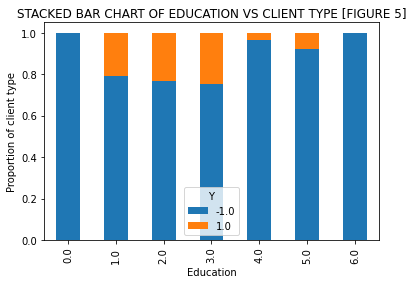

In [ ]:
#Stacked Bar Chart of education vs client type
table=pd.crosstab(data.EDUCATION,data.Y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('STACKED BAR CHART OF EDUCATION VS CLIENT TYPE [FIGURE 5]')
plt.xlabel('Education')
plt.ylabel('Proportion of client type')

From figure 5 we observe that the proportion of default clients of bank of Taiwan studies in high school.

Text(0, 0.5, 'Frequency')

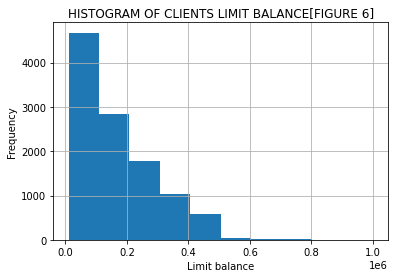

In [ ]:
#Histogram of limit balance of a client
data.LIMIT_BAL.hist()
plt.title('HISTOGRAM OF CLIENTS LIMIT BALANCE[FIGURE 6]')
plt.xlabel('Limit balance')
plt.ylabel('Frequency')


From, figure 6 we observe that the client's limit balance is positively skewed.

Text(0, 0.5, 'Frequency')

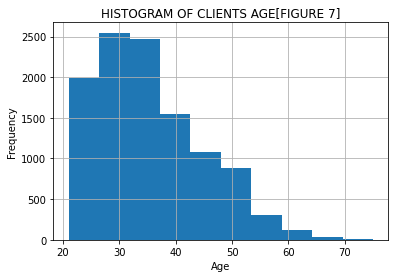

In [ ]:
#Histogram of client's age
data.AGE.hist()
plt.title('HISTOGRAM OF CLIENTS AGE[FIGURE 7]')
plt.xlabel('Age')
plt.ylabel('Frequency')

From, figure 6 we observe that the client's age is also positively skewed.

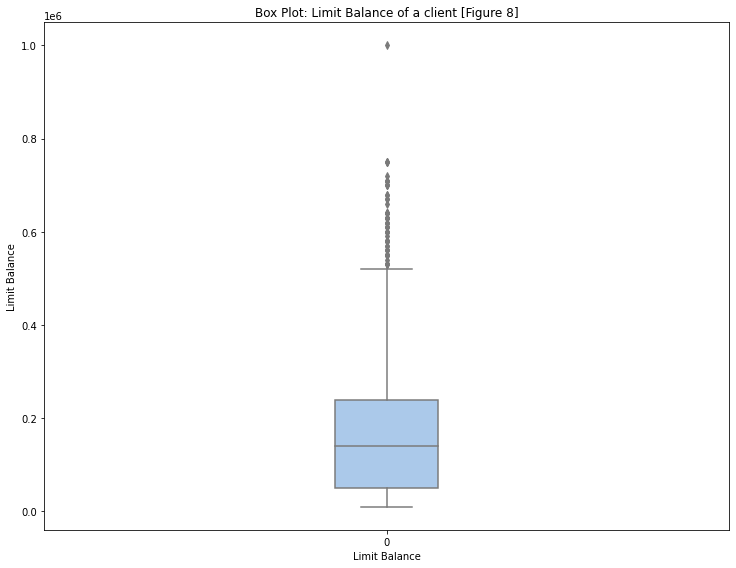

In [ ]:
#Plotting a box plot for Limit Balance.
fig=plt.figure(figsize=(20,8))
ax=fig.add_subplot(122)
sns.boxplot(data=data['LIMIT_BAL'],palette='pastel',width=0.15,ax=ax)
ax.set_title('Box Plot: Limit Balance of a client [Figure 8]')
ax.set_xlabel('Limit Balance')
ax.set_ylabel('Limit Balance')
plt.tight_layout()
plt.show()

Thus we observe that there exist outliers in the datase of limit balance.

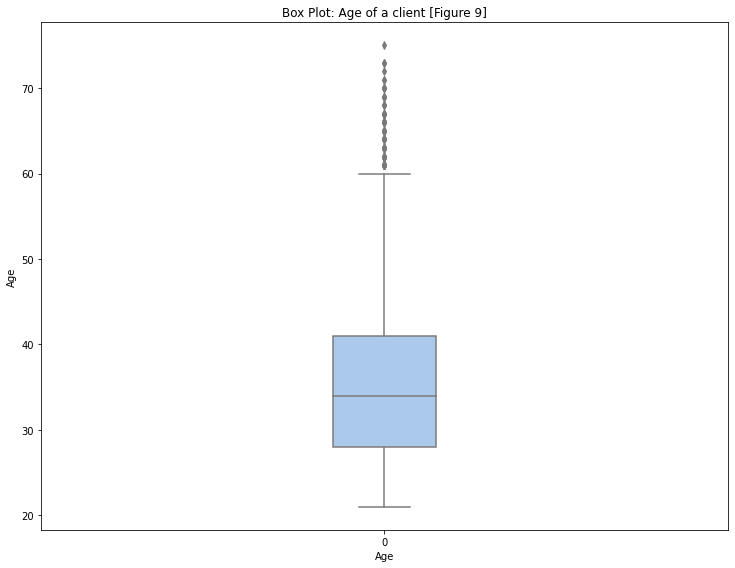

In [ ]:
#Plotting a box plot Age.
fig=plt.figure(figsize=(20,8))
ax=fig.add_subplot(122)
sns.boxplot(data=data['AGE'],palette='pastel',width=0.15,ax=ax)
ax.set_title('Box Plot: Age of a client [Figure 9]')
ax.set_xlabel('Age')
ax.set_ylabel('Age')
plt.tight_layout()
plt.show()

Thus we observe that there exist outliers in the datase of limit balance.

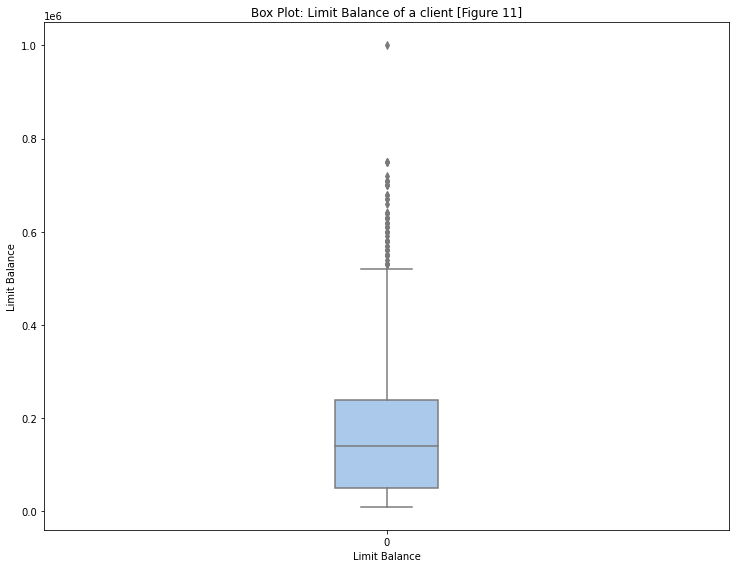

In [ ]:
#Plotting a box plot for Limit Balance.
fig=plt.figure(figsize=(20,8))
ax=fig.add_subplot(122)
sns.boxplot(data=data['LIMIT_BAL'],palette='pastel',width=0.15,ax=ax)
ax.set_title('Box Plot: Limit Balance of a client [Figure 11]')
ax.set_xlabel('Limit Balance')
ax.set_ylabel('Limit Balance')
plt.tight_layout()
plt.show()

**ANALYSIS**

Here, in our dataset it is not needed to create a dummy variables since the categorical variables are already existing in numerical or boolean form.

In [ ]:
#to remove the variables that are not needed
data.drop('ID',axis='columns', inplace=True)

In [ ]:
#Diving the variables into the set of x (independent variable) an y (dependent variable)
X = data.loc[:, data.columns != 'Y']
y = data.loc[:, data.columns == 'Y']

In [ ]:
#Dividing the dataset into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)

SUPPORT VECTOR MACHINE: KERNEL-rbf

In [ ]:
#We create an instance of SVM and fit out data. We do not scale our data since we want to plot the support vectors
#C = 1.0 # SVM regularization parameter
svc1 = SVC(kernel='rbf', C = 0.1,gamma=0.1)
svc1.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.1, gamma=0.1)

Computing the accuracy of SVM with rbf kernel.

In [ ]:
#Obtaining the accuracy of SVM with rbf kernel
y_pred = svc1.predict(X_test)
print('Accuracy of SVM on test set: {:.2f}'.format(svc1.score(X_test, y_test)))#score() gives classification accuracy measure

Accuracy of SVM on test set: 0.78


Here, it is seen that the accuracy is 0.78 i.e. 78%  thus we can say that the model is only 78% accurate in predicting whether the client of Taiwan bank is default or not.

In [ ]:
#Obtaining the accuracy of logistic regression
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1704    0]
 [ 492    0]]


From, the above confusion matrix we conclude that 4683 (4683+0) correct predictions are made using the model and 1317(1317+0) wrong predictions are made. But we know that we have in total 30000 observations thus, our model predicts more of correct results.

In [ ]:
#Obtaining the confusion matrix to check for the accuracy
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        -1.0       0.78      1.00      0.87      1704
         1.0       0.00      0.00      0.00       492

    accuracy                           0.78      2196
   macro avg       0.39      0.50      0.44      2196
weighted avg       0.60      0.78      0.68      2196



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


It is observed from the above classification report that the precision of a classifier is 0.78 with respect to classes of non- default clients and 0 with respect to classes of default clients which means the ability of the classifier to not make wrong predictions in case of non-default client is 82% which is good and in case of default client is 0% which is not a good value since it indicates that the ability of classifier to not make wrong classification based on default clients is 0%.

It is also observed that the recall for the classifier is  1 with respect to classes of non-default clients and 0 with respect to default clients i.e. the model is 100% good at predicting making the correct predictions in case of non-default clients and classifier is not at all good at classifying the default clients.

We know that the f1 score is helpful in understanding the overall performance of the model by taking into account both precision and recall and from the above classification report we observe that the f1-score with respect to non-default and default clients are 0.87 and 0 respectively which indicates that more weightage is given to precision than recall that is the classifier will be more likely to not make wrong predictions in case of non-default clients and more weightage is given to recall than precision that is the classifier will be more likely to make correct predictions in case of default clients.



SUPPORT VECTOR MACHINE: KERNEAL-sigmoid

In [ ]:
#We create an instance of SVM and fit out data. We do not scale our data since we want to plot the support vectors
#C = 1.0 # SVM regularization parameter
svc2 = SVC(kernel='sigmoid', C = 0.1,gamma=0.1)
svc2.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.1, gamma=0.1, kernel='sigmoid')

Computing the accuracy of SVM with sigmoid kernel.

In [ ]:
#Obtaining the accuracy of svm with sigmoid kernel
y_pred1 = svc2.predict(X_test)
print('Accuracy of lsvm with sigmoid kernel classifier on test set: {:.2f}'.format(svc1.score(X_test, y_test)))#score() gives classification accuracy measure

Accuracy of lsvm with sigmoid kernel classifier on test set: 0.78


Here, it is seen that the accuracy is 0.78 i.e. 78%  thus we can say that the model is only 78% accurate in predicting whether the client of Taiwan bank is default or not.

In [ ]:
#Obtaining the accuracy of logistic regression
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred1)
print(confusion_matrix)

[[1704    0]
 [ 492    0]]


From, the above confusion matrix we conclude that 4683 (4683+0) correct predictions are made using the model and 1317 (1317+0) wrong predictions are made. But we know that we have in total 30000 observations thus, our model predicts more correct results.

In [ ]:
#Obtaining the confusion matrix to check for the accuracy
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

        -1.0       0.78      1.00      0.87      1704
         1.0       0.00      0.00      0.00       492

    accuracy                           0.78      2196
   macro avg       0.39      0.50      0.44      2196
weighted avg       0.60      0.78      0.68      2196



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


It is observed from the above classification report that the precision of a classifier is 0.78 with respect to classes of non- default clients and 0 with respect to classes of default clients which means the ability of the classifier to not make wrong predictions in case of non-default client is 82% which is good and in case of default client is 0% which is not a good value since it indicates that the ability of classifier to not make wrong classification based on default clients is 0%.

It is also observed that the recall for the classifier is  1 with respect to classes of non-default clients and 0 with respect to default clients i.e. the model is 100% good at predicting making the correct predictions in case of non-default clients and classifier is not at all good at classifying the default clients.

We know that the f1 score is helpful in understanding the overall performance of the model by taking into account both precision and recall and from the above classification report we observe that the f1-score with respect to non-default and default clients are 0.87 and 0 respectively which indicates that more weightage is given to precision than recall that is the classifier will be more likely to not make wrong predictions in case of non-default clients and more weightage is given to recall than precision that is the classifier will be more likely to make correct predictions in case of default clients.



**CONCLUSION**

From the above comparison we observe that we get equal accuracy on using both the kernels where as theoretically rbf is expected to give more accuracy than sigmoid. 

The accuracy obtained for the classifiers using either of the kernel is 78% while we cannot vclaim that the clssifier is good only on the basis of accuracy because on observing the classification result it is observed that the classifier has like 0% chance of classifying the default clients correctly which is not a good indication thus we may conclude that the classifier is not very accurate.